## TF-IDF

Natural Language Processing (NLP) is a sub-field of artificial intelligence that deals understanding and processing human language. In light of new advancements in machine learning, many organizations have begun applying natural language processing for translantion, chatbots and candidate filtering. 

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
documentoA = 'the man went out for a walk'
documentoB = 'the children sat around the fire'

Machine learning algorithms cannot work with raw text directly. Rather, the text must be converted into vectors of numbers. In natural language processing, a common technique for extracting features from text is to place all of the words that occur in the text in a bucket.This aproach is called a BAG OF WORDS MODEL or BoW for short. It's referred to as a "bag" of words because any information about the structure of the sentence is lost. 

In [5]:
bagOFwordA = documentoA.split(' ')
bagOFwordB = documentoB.split(' ')

In [6]:
uniqueWords = set(bagOFwordA).union(set(bagOFwordB))

In [7]:
print(uniqueWords)

{'man', 'out', 'the', 'a', 'around', 'children', 'for', 'went', 'walk', 'fire', 'sat'}


In [8]:
numOFwordA = dict.fromkeys(uniqueWords, 0)
for word in bagOFwordA:
    numOFwordA[word] += 1
    
numOFwordB = dict.fromkeys(uniqueWords, 0)
for word in bagOFwordB:
    numOFwordB[word] += 1

In [9]:
print(numOFwordA)
print(numOFwordB)

{'man': 1, 'out': 1, 'the': 1, 'a': 1, 'around': 0, 'children': 0, 'for': 1, 'went': 1, 'walk': 1, 'fire': 0, 'sat': 0}
{'man': 0, 'out': 0, 'the': 2, 'a': 0, 'around': 1, 'children': 1, 'for': 0, 'went': 0, 'walk': 0, 'fire': 1, 'sat': 1}


Another problem with the bag of words approach is that it doesn't account for noise. In other words, certain words are used to formulate sentences but do not add any semantic meaning to the text. For example, the most commonly used word in the english language is "the" which represents 7% of all words written or spoken. You couldn't make deduce anything abouth a text given the fact that it contains the word "the". On the other hand, words like good and awesome could be used to determine wheter a rating was  positive or not. 

In natural language processing, useless words are referred to as stop words. The python natural language toolkit provides a list of english stop words. 

In [10]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Term Frequency 

The number of times a word appears in a document divided by the total number of words in the document. Every document has its own term frequency. 

In [11]:
def computeTF (wordDict, bagOFword):
    tfDict = {}
    bagOFwordsCount = len(bagOFword)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bagOFwordsCount)
    return tfDict

In [12]:
tfA = computeTF(numOFwordA, bagOFwordA)
tfB = computeTF(numOFwordB, bagOFwordB)

## Inverse Data Frequency (IDF)

The log of the number of documents divided by the number of documents that contain the word w, Inverse data frequeny determines the weight of rare words across all documents in the corpus.  

In [20]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] +=1
                
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/float(val))
    return idfDict

In [21]:
idfs = computeIDF([numOFwordA, numOFwordB])

Lastly, the TF-IDF is simply the TF multiplied by IDF

In [22]:
def computeTFIDF(tfBagOFword, idfs):
    tfidf = {}
    for word, val in tfBagOFword.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [24]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

In [25]:
df

,man,out,the,a,around,children,for,went,walk,fire,sat
0,0.099021,0.099021,0.0,0.099021,0.000000,0.000000,0.099021,0.099021,0.099021,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.115525,0.115525,0.000000,0.000000,0.000000,0.115525,0.115525


In [27]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentoA, documentoB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = feature_names)

In [28]:
df

,around,children,fire,for,man,out,sat,the,walk,went
0,0.000000,0.000000,0.000000,0.42616,0.42616,0.42616,0.000000,0.303216,0.42616,0.42616
1,0.407401,0.407401,0.407401,0.00000,0.00000,0.00000,0.407401,0.579739,0.00000,0.00000


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   around    2 non-null      float64
 1   children  2 non-null      float64
 2   fire      2 non-null      float64
 3   for       2 non-null      float64
 4   man       2 non-null      float64
 5   out       2 non-null      float64
 6   sat       2 non-null      float64
 7   the       2 non-null      float64
 8   walk      2 non-null      float64
 9   went      2 non-null      float64
dtypes: float64(10)
memory usage: 288.0 bytes


In [34]:
crr = df.corr()

In [35]:
crr

,around,children,fire,for,man,out,sat,the,walk,went
around,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
children,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
fire,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
for,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
man,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
out,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
sat,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
the,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
walk,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
went,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0


<AxesSubplot:>

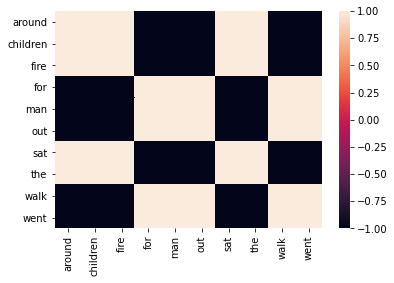

In [36]:
sns.heatmap(crr)